# En este ejercicio profundizarás en los modelos de regresión penalizada. Carga el dataset California housing, y realiza un modelo de regresión Ridge de la mediana de los valores de las casas (variable respuesta Y ) con las variables restantes (numéricas y categóricas) del dataset:

## a) Con el hiperparámetro de encogimiento ${α = 1}$.

In [3]:
# cargar librerias-----------------------------------------------
import pandas as pd
import numpy as np
from pandas.core.common import flatten
from plotnine import *
from array import *
import scipy.stats as stats
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

import os
import tarfile
import urllib.request

In [4]:
# definir las rutas y caminos donde se encuentran los datos------
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
# path que se va a crear en nuestro sistema----------------------
HOUSING_PATH = os.path.join("datasets", "housing")
# lugar de descarga del dataset----------------------------------
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [5]:
# definir una funcion que obtenga los datos y los descargue-----
def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

In [6]:
# definir una funcion que cargue el csv en un dataframe----------
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [16]:
# path que se va a crear en nuestro sistema----------------------
HOUSING_PATH = os.path.join("datasets", "housing")
# definir una funcion que cargue el csv en un dataframe----------
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# cargar base
housing = load_housing_data()
# separar variable respuesta del dataset-------------------------
respuesta = housing["median_house_value"].copy()
housing = housing.drop("median_house_value", axis=1)
# definir var numerica-------------------------------------------
housing_num = housing.drop("ocean_proximity", axis=1)
# importar el "imputador"----------------------------------------
from sklearn.impute import SimpleImputer
# importar el "estandarizador"-----------------------------------
from sklearn.preprocessing import StandardScaler
# importar la clase pipeline"------------------------------------
from sklearn.pipeline import Pipeline
# definir el pipeline--------------------------------------------
num_pipeline = Pipeline([("imputador", SimpleImputer(strategy="median")),("std_scaler", StandardScaler()),])
# aplicar el pipeline--------------------------------------------
housing_num_tr = num_pipeline.fit_transform(housing_num)
# importar clases------------------------------------------------
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# separar dataset en variables numericas y variable categorica---
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
# definir full pipeline------------------------------------------
full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs),("cat", OneHotEncoder(drop = "first"), cat_attribs),])
housing_prepared = full_pipeline.fit_transform(housing)

Una vez que se han importado las librerías, se carga el dataset California housing y
se prepara la matriz de diseño y la variable respuesta del modo que se hizo en los
ejercicios resultados del tema anterior.

Una vez que se ha obtenido la matriz de diseño X, y la variable respuesta por separado,
se puede realizar la regresión penalizada. Para ello emplearemos una clase de tipo
Ridge de la librería sklearn.

In [19]:
# importar clase-------------------------------------------------
from sklearn.linear_model import Ridge
# ajustar el modelo----------------------------------------------
ridge_reg = Ridge(alpha = 1, solver = "auto")
ridge_reg.fit(housing_prepared, respuesta)
# obtener coeficientes del modelo--------------------------------
# intercepto

Ridge(alpha=1)

In [20]:
print(ridge_reg.intercept_)
# coeficientes de regresion

219251.85470476843


In [21]:
print(ridge_reg.coef_)

[-52925.7575442  -53744.69781116  13319.85812079 -10293.66412867
  29937.78985234 -44479.43818497  29692.21439608  73624.96037269
 -39789.87191589 130031.63921427  -3697.62935336   4750.43033774]


El valor de α = 1 no aplica apenas penalización y los resultados obtenidos son prácti-
camente los mismos que se obtenían en el modelo de regresión lineal (ver ejercicios
resueltos del Tema 5).

## b) Con el hiperparámetro de encogimiento ${α = 10^4}$.

Si se aumenta el valor de la penalización hasta α = 10^4 se observa cómo los valores
de las estimaciones de los coeficientes de regresión ya disminuyen.

In [24]:
# importar clase-------------------------------------------------
from sklearn.linear_model import Ridge
# ajustar el modelo----------------------------------------------
ridge_reg_b = Ridge(alpha = 1e4, solver = "auto")
ridge_reg_b.fit(housing_prepared, respuesta)
# obtener coeficientes del modelo--------------------------------
# intercepto

Ridge(alpha=10000.0)

In [23]:
print(ridge_reg_b.intercept_)
# coeficientes de regresion

213248.3244996107


In [25]:
print(ridge_reg_b.coef_)

[ -9760.89761151 -12228.34267466  11199.36514172   5640.33695302
   4851.91951441  -9762.34854409   5734.63871066  50971.33381983
 -24316.41748776     89.44198348   5253.33235919   5765.58163202]


Se puede calcular (como se hizo en el Tema 5) cuál era la estimación de los coeficientes
de regresión para el modelo de regresión lineal general (sin penalizar), y comparar las
3 series de coeficientes obtenidas mediante el gráfico de barras que se muestra en la
Figura 8. Se observa que los valores de la estimación de los coeficientes de la regresión
penalizada para un α = 10 4 son mucho menores.

In [26]:
# importar clase-------------------------------------------------
from sklearn.linear_model import LinearRegression
# ajustar el modelo----------------------------------------------
lm1 = LinearRegression()
lm1.fit(housing_prepared, respuesta)
# obtener coeficientes del modelo--------------------------------
# intercepto

LinearRegression()

In [28]:
print(lm1.intercept_)
# coeficientes de regresion

219237.00064331223


In [29]:
print(lm1.coef_)

[-52952.95152846 -53767.62485624  13312.88334575 -10320.06092603
  29920.76507621 -44490.47744263  29746.22226671  73636.15586366
 -39766.3987444  156065.71982235  -3697.40166109   4758.75361226]


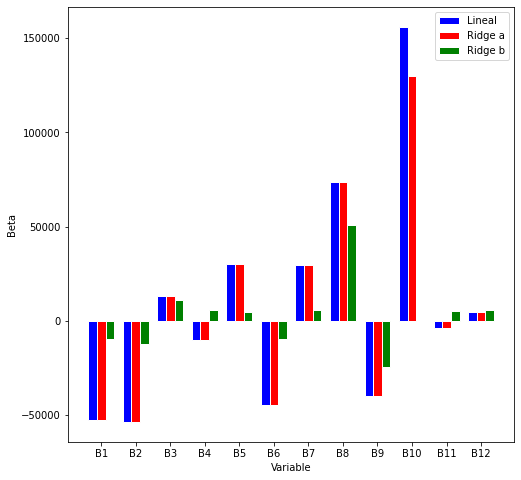

In [31]:
fig = plt.figure(figsize=(8, 8))
# ancho de barra-------------------------------------------------
barWidth = 0.25
# definir posicion barras series---------------------------------
r1 = np.arange(len(lm1.coef_))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
# pintar las barras----------------------------------------------
plt.bar(r1, lm1.coef_, color = "blue",
width = barWidth, edgecolor = "white", label = "Lineal");
plt.bar(r2, ridge_reg.coef_, color = "red",
width = barWidth, edgecolor = "white", label = "Ridge a");
plt.bar(r3, ridge_reg_b.coef_, color = "green",
width = barWidth, edgecolor = "white", label = "Ridge b");
plt.xticks([r + barWidth for r in range(len(lm1.coef_))],
['B1', 'B2', 'B3', 'B4',
'B5', 'B6', 'B7', 'B8',
'B9', 'B10', 'B11', 'B12']);
plt.legend();
plt.xlabel("Variable");
plt.ylabel("Beta");
plt.show(fig)

# Sobre el dataset California housing, realiza un modelo de regresión LASSO de la mediana de los valores de las casas (variable respuesta Y ) con las variables restantes (numéricas y categóricas) del dataset:

## a) Con el hiperparámetro de encogimiento α = 1.

In [32]:
# importar clase-------------------------------------------------
from sklearn.linear_model import Lasso
# ajustar el modelo----------------------------------------------
lasso_reg = Lasso(alpha = 1)
lasso_reg.fit(housing_prepared, respuesta)
# obtener coeficientes del modelo--------------------------------
# intercepto

Lasso(alpha=1)

In [34]:
print(lasso_reg.intercept_)
# coeficientes de regresion

219239.371611401


In [35]:
print(lasso_reg.coef_)

[-52936.10528879 -53753.78630134  13312.79044653 -10299.69365603
  29909.69564186 -44483.79617817  29730.65349082  73630.76579416
 -39774.84408823 151938.98956871  -3679.84442713   4753.79358651]


El valor de α = 1 no aplica apenas penalización y los resultados obtenidos son prácticamente los mismos que se obtenían en el modelo de regresión lineal (ver ejercicios
resueltos del Tema 5).

## b) Con el hiperparámetro de encogimiento α = 10^4 .

Si se aumenta el valor de la penalización hasta α = 10 4 se observa como los valores
de las estimaciones de los coeficientes de regresión ya disminuyen, y en este caso,
además, al hacerse 0 algunos de los coeficientes se está produciendo selección de variables.

In [36]:
# importar clase-------------------------------------------------
from sklearn.linear_model import Lasso
# ajustar el modelo----------------------------------------------
lasso_reg_b = Lasso(alpha = 1e4)
lasso_reg_b.fit(housing_prepared, respuesta)
# obtener coeficientes del modelo--------------------------------
# intercepto

Lasso(alpha=10000.0)

In [37]:
print(lasso_reg_b.intercept_)
# coeficientes de regresion

218717.123954823


In [38]:
print(lasso_reg_b.coef_)

[    -0.             -0.           5925.06123247      0.
      0.             -0.              0.          65973.15122729
 -37370.99334873      0.              0.              0.        ]


## c) Compara ambos modelos con los modelos del ejercicio 1. ¿Qué se observa?

Se pueden comparar los valores de la regresión lineal con las regresiones Ridge y
LASSO con α = 10 4 . En la Figura 9 Se observa que aunque en la regresión de tipo
Lasso desaparezcan algunas variables, en otras se estima un coeficiente de regresión
más alto que con los otros modelos. Esto es debido a que cuando dos variables están
correlacionadas tiende a descartar una y a ajustar por la otra.

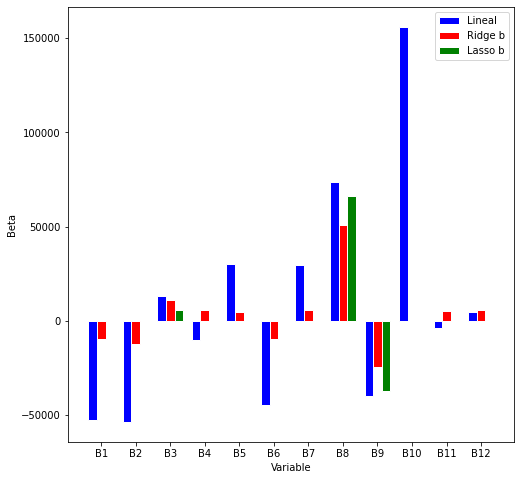

In [40]:
fig = plt.figure(figsize=(8, 8))
# ancho de barra-------------------------------------------------
barWidth = 0.25
# definir posicion barras series---------------------------------
r1 = np.arange(len(lm1.coef_))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
# pintar las barras----------------------------------------------
plt.bar(r1, lm1.coef_, color = "blue",
width = barWidth, edgecolor = "white", label = "Lineal");
plt.bar(r2, ridge_reg_b.coef_, color = "red",
width = barWidth, edgecolor = "white", label = "Ridge b");
plt.bar(r3, lasso_reg_b.coef_, color = "green",
width = barWidth, edgecolor = "white", label = "Lasso b");
plt.xticks([r + barWidth for r in range(len(lm1.coef_))],
['B1', 'B2', 'B3', 'B4',
'B5', 'B6', 'B7', 'B8',
'B9', 'B10', 'B11', 'B12']);
plt.legend();
plt.xlabel("Variable");
plt.ylabel("Beta");
plt.show()

# Sobre el dataset California housing, realiza un modelo de regresión de Red Elástica de la mediana de los valores de las casas (variable respuesta Y ) con las variables restantes (numéricas y categóricas) del dataset

## En ambos casos, ajusta α por validación cruzada (Usa k = 10 particiones).

## a) Fijando r = 0.1.

En la primera Red, se fija el hiperparámetro r en 0.1 y se ajusta el modelo de tipo red
elástica realizando validación cruzada utilizando la clase ElasticNetCV del paquete
sklearn.linear_model. En los argumentos de la clase definiremos las particiones de
la CV con el argumento cv y r con el argumento l1_ratio: (cv = 10 y l1_ratio = 0.1).

In [43]:
# semilla para que los resultados sean los mismos----------------
np.random.seed(3)
# importar clase-------------------------------------------------
from sklearn.linear_model import ElasticNetCV
# ajustar el modelo----------------------------------------------
e_net = ElasticNetCV(cv = 10, l1_ratio = 0.1)
e_net.fit(housing_prepared, respuesta)
# obtener coeficientes del modelo--------------------------------
# intercepto

ElasticNetCV(cv=10, l1_ratio=0.1)

In [44]:
print(e_net.intercept_)
# coeficientes de regresion

206865.4749645959


In [45]:
print(e_net.coef_)

[ -7.3285382  -23.12318484  16.94967114  21.48093501   7.83412633
  -3.90892666  10.4757704  110.83304095 -36.29600822   0.
   8.01288948   7.55581778]


Se observa que la red A no realiza apenas selección de variables ya que sólo uno de los
parámetros es encogido hasta 0.

## b) Fijando r = 0.95.

En esta Red, al aumentar el valor de r se espera un comportamiento diferente.
Veamos:

In [46]:
# semilla para que los resultados sean los mismos----------------
np.random.seed(3)
# importar clase-------------------------------------------------
from sklearn.linear_model import ElasticNetCV
# ajustar el modelo----------------------------------------------
e_net_b = ElasticNetCV(cv = 10, l1_ratio = 0.95)
e_net_b.fit(housing_prepared, respuesta)
# obtener coeficientes del modelo--------------------------------
# intercepto

ElasticNetCV(cv=10, l1_ratio=0.95)

In [47]:
print(e_net_b.intercept_)
# coeficientes de regresion

208267.51670197048


In [48]:
print(e_net_b.coef_)

[-1469.95946607 -3059.90966939  2747.34800787  2439.66788593
   801.03210661 -1171.1003709   1151.60483666 15113.62768328
 -5336.05497542     0.          1215.79217006  1141.77891116]


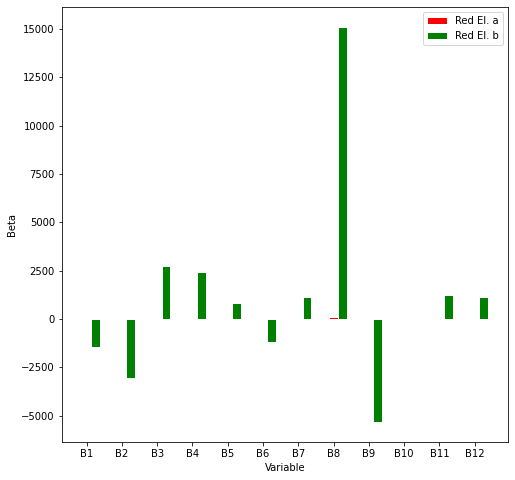

In [49]:
fig = plt.figure(figsize=(8, 8))
# ancho de barra-------------------------------------------------
barWidth = 0.25
# definir posicion barras series---------------------------------
r1 = np.arange(len(e_net.coef_))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
# pintar las barras----------------------------------------------
plt.bar(r2, e_net.coef_, color = "red",
width = barWidth, edgecolor = "white", label = "Red El. a");
plt.bar(r3, e_net_b.coef_, color = "green",
width = barWidth, edgecolor = "white", label = "Red El. b");
plt.xticks([r + barWidth for r in range(len(lm1.coef_))],
['B1', 'B2', 'B3', 'B4',
'B5', 'B6', 'B7', 'B8',
'B9', 'B10', 'B11', 'B12']);
plt.legend();
plt.xlabel("Variable");
plt.ylabel("Beta");
plt.show()

Se obtienen unos valores muy distintos de los coeficientes. En la primera Red, más
cercana a la regresión Ridge, los coeficientes se han encogido demasiado. En cambio,
en la segunda red se obtienen unos valores más grandes de los coeficientes. Si tene-
mos dudas entre ambas Redes, podemos poner la lista de posibles valores de r en el
argumento l1_ratio y ver con cuál de los dos modelos se obtiene un menor error de
test.

In [51]:
# semilla para que los resultados sean los mismos----------------
np.random.seed(3)
# importar clase-------------------------------------------------
from sklearn.linear_model import ElasticNetCV
# ajustar el modelo----------------------------------------------
e_net_c = ElasticNetCV(cv = 10, l1_ratio = [0.1, 0.95])
e_net_c.fit(housing_prepared, respuesta)
# obtener coeficientes del modelo--------------------------------
# intercepto
# print(e_net_c.intercept_)
# coeficientes de regresion
# print(e_net_c.coef_)

ElasticNetCV(cv=10, l1_ratio=[0.1, 0.95])

In [52]:
print(e_net_c.l1_ratio_)
# se puede comprobar que el error de test es mayor con r = 0.1---
# error = e_net_c.mse_path_
# np.mean(error, axis = 2)

0.95


Se observa que se ha escogido el valor de 0.95, por lo que es el valor que minimiza el
error de test por CV (el cual se puede analizar en el atributo .mse_path_).